In [20]:
# Imports
import skimage
import scipy
from matplotlib import pyplot as plt
import numpy as np

In [21]:
def laplacian_of_gaussian(image, kernel_size=5, sigma=1):
    # Apply Gaussian blur to the image
    blurred_image = scipy.ndimage.gaussian_filter(image, sigma)
    
    # Define Laplacian kernel and convolve over smoothed image 
    laplacian_kernel = np.array([[0,1,0],
                                 [1,-4,1],
                                 [0,1,0]])
    laplacian_image = scipy.ndimage.convolve(blurred_image, laplacian_kernel)

    return laplacian_image

def zero_cross(image):
    z_c_image = np.zeros(image.shape)
    thresh = np.absolute(image).mean() * 0.75
    h,w = image.shape
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            patch = image[y-1:y+2, x-1:x+2]
            p = image[y, x]
            maxP = patch.max()
            minP = patch.min()
            if (p > 0):
                zeroCross = True if minP < 0 else False
            else:
                zeroCross = True if maxP > 0 else False
            if ((maxP - minP) > thresh) and zeroCross:
                z_c_image[y, x] = 1
    return z_c_image


def find_optimal_sigma(image):
    # Define a range of sigma values to experiment with
    sigma_values = np.arange(0.5, 8.0, 0.1)  # Adjust range and step size as needed

    # Initialize lists to store threshold values and LoG-filtered images
    threshold_values = []
    filtered_images = []

    # Compute LoG-filtered images for each sigma value and apply Otsu's method
    for sigma in sigma_values:
        # Apply Gaussian blur
        blurred_image = skimage.filters.gaussian(image, sigma=sigma)
        # Apply LapGau filter
        log_filtered_image = skimage.filters.laplace(blurred_image)
        # Apply Otsu's method to determine threshold value
        threshold_value = skimage.filters.threshold_otsu(log_filtered_image)
        # Store threshold value and filtered image
        threshold_values.append(threshold_value)
        filtered_images.append(log_filtered_image)

    # Determine the optimal sigma value based on the maximum threshold value
    optimal_sigma_index = np.argmax(threshold_values)
    optimal_sigma = sigma_values[optimal_sigma_index]
    optimal_filtered_image = filtered_images[optimal_sigma_index]

    return optimal_sigma, optimal_filtered_image

In [22]:
shakey_image = skimage.io.imread('Data-2/shakey.png', as_gray=True)

In [23]:
# Apply Laplacian of Gaussian filter
# filtered_image = laplacian_of_gaussian(shakey_image, sigma=4.5)
#filtered_image_2 = laplacian_of_gaussian(shakey_image, sigma=3)

#threshold = skimage.filters.threshold_otsu(filtered_image)
#binary_image = filtered_image > threshold
#print("Threshold: ", threshold)

optimal_sigma, optimal_sigma_image = find_optimal_sigma(shakey_image)

print(f'Optimal Sigma: {optimal_sigma}')

# optimal_sigma_image = laplacian_of_gaussian(shakey_image)

z_c_filtered = zero_cross(optimal_sigma_image)
# z_c_filtered_2 = zero_cross(filtered_image)

Optimal Sigma: 4.899999999999999


In [24]:
# Show the original and filtered images
plt.figure(dpi=200)
#equalized_image = skimage.exposure.equalize_hist(filtered_image)

#smoothed_image = skimage.filters.gaussian(equalized_image, sigma=1)

#median_image = skimage.filters.median(shakey_image)



<Figure size 1280x960 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

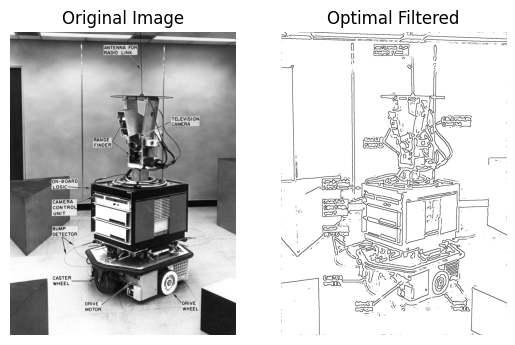

In [25]:
# z_c_filtered_image = zero_cross(filtered_image)
# z_c_filtered_image_2 = zero_cross(filtered_image_2)


# plt.subplot(1, 3, 1)
# plt.imshow(shakey_image, cmap='gray')
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.imshow(z_c_filtered_image, cmap='gray')
# plt.title('Filtered (s.d. 1)')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.imshow(z_c_filtered_image_2, cmap='gray')
# plt.title('Filtered (s.d. 1.5)')
# plt.axis('off')

plt.subplot(1,2,1)
plt.imshow(shakey_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(z_c_filtered, cmap='binary')
plt.title('Optimal Filtered')
plt.axis('off')

# plt.subplot(1,3,3)
# plt.imshow(z_c_filtered_2, cmap='gray')
# plt.title('Filtered 4.5')
# plt.axis('off')

plt.savefig('output.png', dpi=400)

plt.show()